In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/Walmart_Sales.csv')

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# We know that sales aren't affected by the holiday flag so we can remove this features from the data
df.drop("Holiday_Flag", axis=1, inplace=True)

df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,56.47,3.969,192.330854,8.667


In [4]:
# We need to get the week, month, year features from the Date feature
df["Month"] = df['Date'].str[3:5].astype(int)
df["Year"] = df['Date'].str[6:].astype(int)

def day_to_week(day):
    if 1 <= day <= 7:
        return 1
    elif 8 <= day <= 14:
        return 2
    elif 15 <= day <= 21:
        return 3
    elif 22 <= day <= 28:
        return 4
    else:
        return 5

df['Week'] = df['Date'].str[0:2].astype(int).apply(day_to_week)

df.drop('Date', axis=1, inplace=True)

df

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,1643690.90,42.31,2.572,211.096358,8.106,2,2010,1
1,1,1641957.44,38.51,2.548,211.242170,8.106,2,2010,2
2,1,1611968.17,39.93,2.514,211.289143,8.106,2,2010,3
3,1,1409727.59,46.63,2.561,211.319643,8.106,2,2010,4
4,1,1554806.68,46.50,2.625,211.350143,8.106,3,2010,1
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,64.88,3.997,192.013558,8.684,9,2012,4
6431,45,733455.07,64.89,3.985,192.170412,8.667,10,2012,1
6432,45,734464.36,54.47,4.000,192.327265,8.667,10,2012,2
6433,45,718125.53,56.47,3.969,192.330854,8.667,10,2012,3


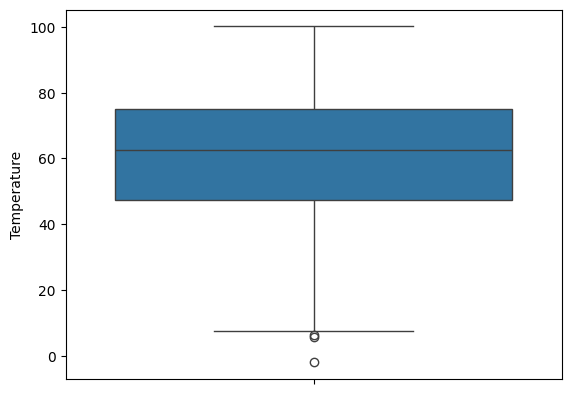

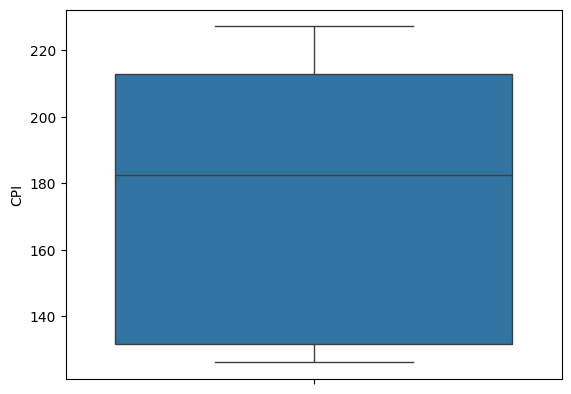

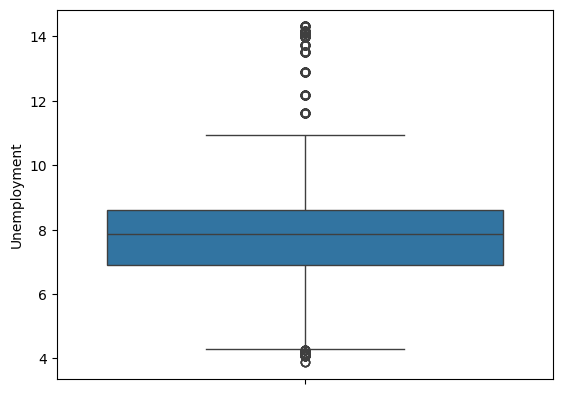

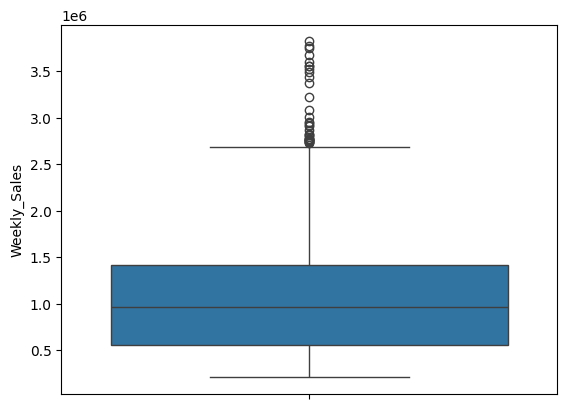

In [5]:
# Now we need do feature scaling for numerical features
# Now we will find out outliers in the data
features = ['Temperature', 'CPI', 'Unemployment', 'Weekly_Sales']

for feature in features:
    sns.boxplot(df, y=feature)
    plt.show()

In [6]:
def remove_outlier(feature):
    Q1 = np.percentile(df[feature], 25, method='midpoint')
    Q3 = np.percentile(df[feature], 75, method='midpoint')
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_filtered = df[(df[feature] >= lower) & (df[feature] <= upper)]
    
    return df_filtered

In [7]:
for feature in features:
    df = remove_outlier(feature)

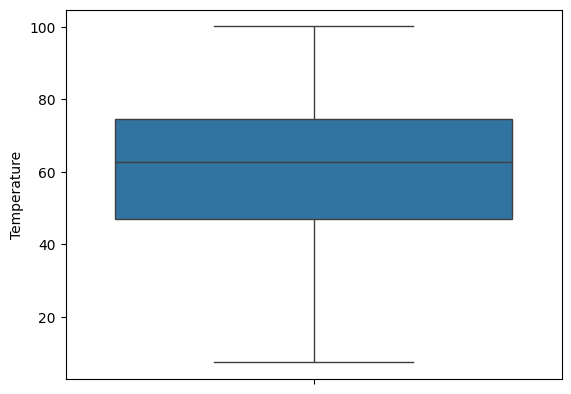

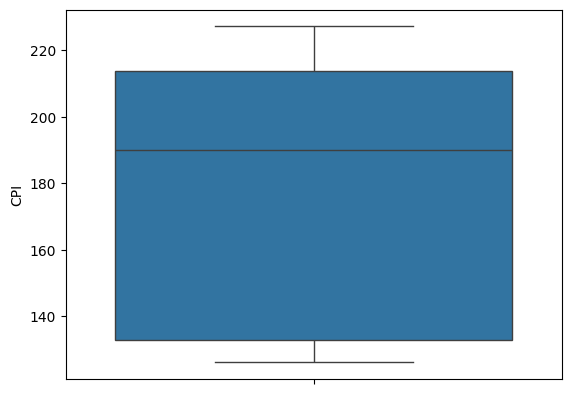

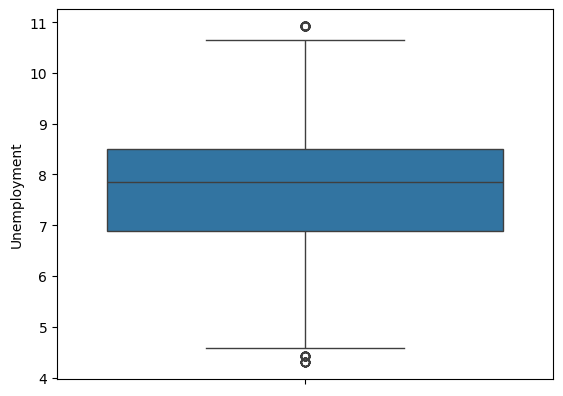

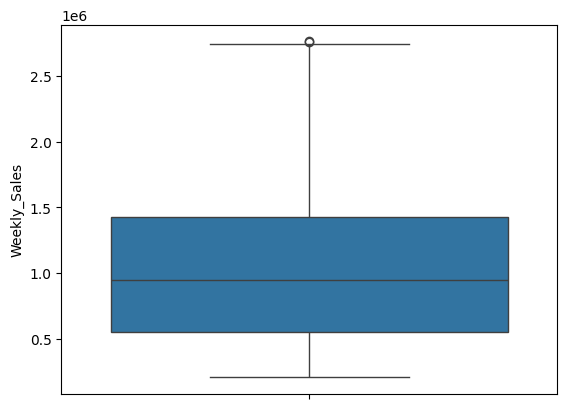

In [8]:
for feature in features:
    sns.boxplot(df, y=feature)
    plt.show()

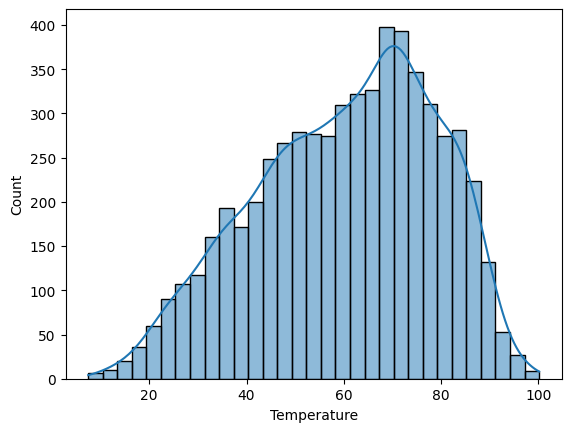

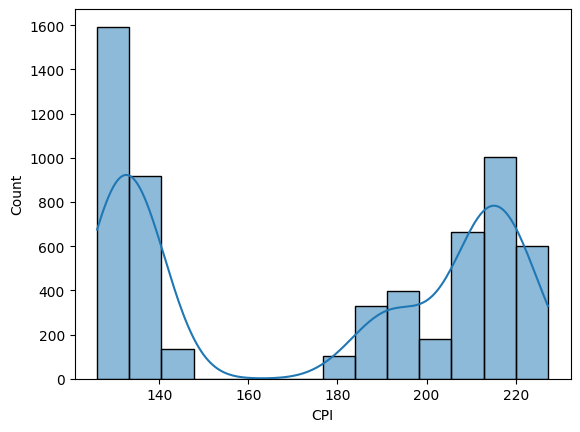

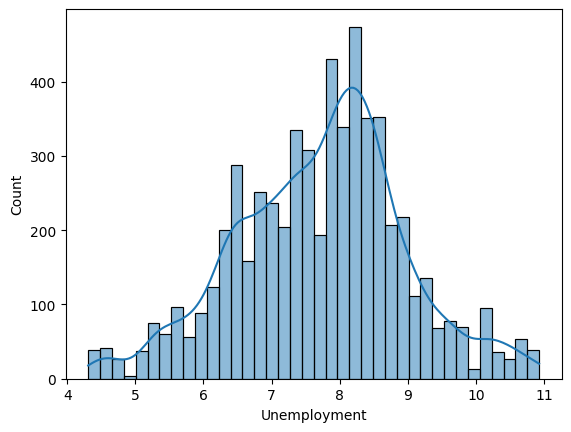

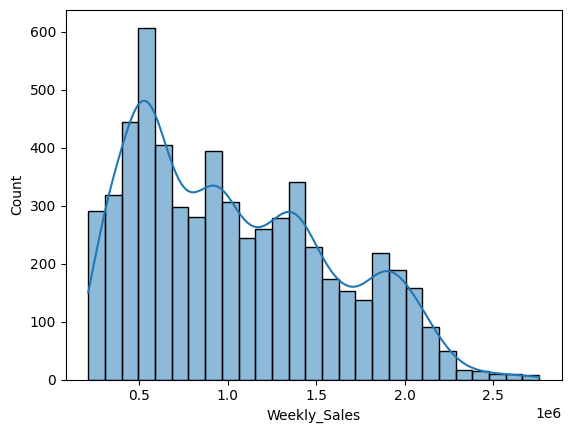

In [9]:
features = ['Temperature', 'CPI', 'Unemployment', 'Weekly_Sales']

for feature in features:
    sns.histplot(df, x=feature, kde=True)
    plt.savefig(f"../figures/{feature}_distribution.png")
    plt.show()

In [10]:
# We now know that we can just use standardscaler for the (unemployment, temperature)
from sklearn.preprocessing import StandardScaler, RobustScaler

standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

standard_features = ['Temperature', 'Unemployment']
robust_features = ['CPI']

df[standard_features] = standard_scaler.fit_transform(df[standard_features])
df[robust_features] = robust_scaler.fit_transform(df[robust_features])

df

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,1643690.90,-0.983882,2.572,0.260271,0.309334,2,2010,1
1,1,1641957.44,-1.190454,2.548,0.262071,0.309334,2,2010,2
2,1,1611968.17,-1.113261,2.514,0.262651,0.309334,2,2010,3
3,1,1409727.59,-0.749043,2.561,0.263027,0.309334,2,2010,4
4,1,1554806.68,-0.756110,2.625,0.263404,0.309334,3,2010,1
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0.243046,3.997,0.024764,0.774268,9,2012,4
6431,45,733455.07,0.243589,3.985,0.026700,0.760593,10,2012,1
6432,45,734464.36,-0.322852,4.000,0.028635,0.760593,10,2012,2
6433,45,718125.53,-0.214130,3.969,0.028680,0.760593,10,2012,3


In [11]:
# We know that the fuel_price doesn't matter that much so we can drop it
df.drop('Fuel_Price', axis=1, inplace=True)

df

,Store,Weekly_Sales,Temperature,CPI,Unemployment,Month,Year,Week
0,1,1643690.90,-0.983882,0.260271,0.309334,2,2010,1
1,1,1641957.44,-1.190454,0.262071,0.309334,2,2010,2
2,1,1611968.17,-1.113261,0.262651,0.309334,2,2010,3
3,1,1409727.59,-0.749043,0.263027,0.309334,2,2010,4
4,1,1554806.68,-0.756110,0.263404,0.309334,3,2010,1
...,...,...,...,...,...,...,...,...
6430,45,713173.95,0.243046,0.024764,0.774268,9,2012,4
6431,45,733455.07,0.243589,0.026700,0.760593,10,2012,1
6432,45,734464.36,-0.322852,0.028635,0.760593,10,2012,2
6433,45,718125.53,-0.214130,0.028680,0.760593,10,2012,3


In [13]:
# Now we have a preprocessed data, we need to save it for using the model on it
df.to_csv("../data/processed/walmart_sales_preprocessed.csv")